<img src="header_anwender.png" align="left"/>

# Anwendungsbeispiel Classification with CNN (MNIST)


Das Ziel des Beispieles ist es handschriftliche Ziffern zu klassifizieren.
Dazu verwenden wir den MNIST Datensatz [1]. Dieser Datensatz enthält 60.000 Scans von Ziffern zum Trainieren und 10.000 Scans von Ziffern für die Validierung. Ein Sample besteht aus 28x28 Features mit Werten zwischen 0 und 255. Zu beachten ist, dass die Features invertiert sind. Eigentlich sind Ziffern eher dunkel auf hellem Hintergrund. MNIST Ziffern sind hell auf dunklem Hintergrund.

Dieses Beispiel beruht auf einem Tutorial von Jason Brownlee [2] mit Hinweisen auf die Optimierung aus [3].


- [1] [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/)
- [2] https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
- [3] https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist


In [19]:
#
# Importieren der Module
#
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn


#
# Tensorflow und Keras
#
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import model_from_json
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping


#
# Abdrehen von Fehlermeldungen
#
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=Warning)


#
# Für GPU Support
#
tflogger = tf.get_logger()
tflogger.setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR )
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


#
# Einstellen der Grösse von Diagrammen
#
plt.rcParams['figure.figsize'] = [16, 9]


#
# Ausgabe der Versionen
#
print('working on keras version {} on tensorflow {} using sklearn {}'.format ( tf.keras.__version__, tf.version.VERSION, sklearn.__version__ ) )

working on keras version 2.2.4-tf on tensorflow 1.14.0 using sklearn 0.23.2


# Vorbereiten der Daten

In [20]:
#
# Laden der Beispieldaten (hier sehr vereinfacht) und gleichzeitige Aufteilung in Trainings- und Testdaten
#
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
#
# Anzeige der Anzahl und Form der Samples
#
print('Trainingsdaten: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Testdaten: X=%s, y=%s' % (x_test.shape, y_test.shape))

Trainingsdaten: X=(60000, 28, 28), y=(60000,)
Testdaten: X=(10000, 28, 28), y=(10000,)


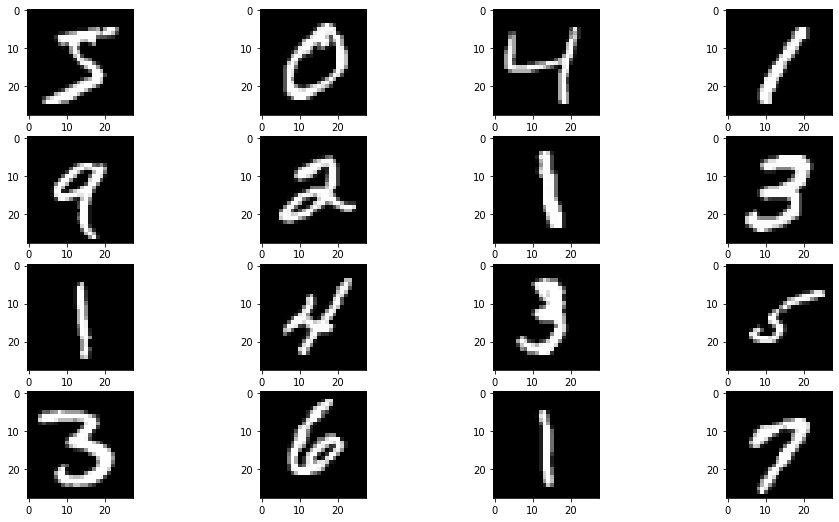

In [7]:
#
# Anzeige von Beispielen der Daten
#
for i in range(16):
    plt.subplot(4,4,1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
#
# Anzeige der Labels zu den Daten
#
for i in range(16):
    print('label {}'.format(y_train[i]))

label 5
label 0
label 4
label 1
label 9
label 2
label 1
label 3
label 1
label 4
label 3
label 5
label 3
label 6
label 1
label 7


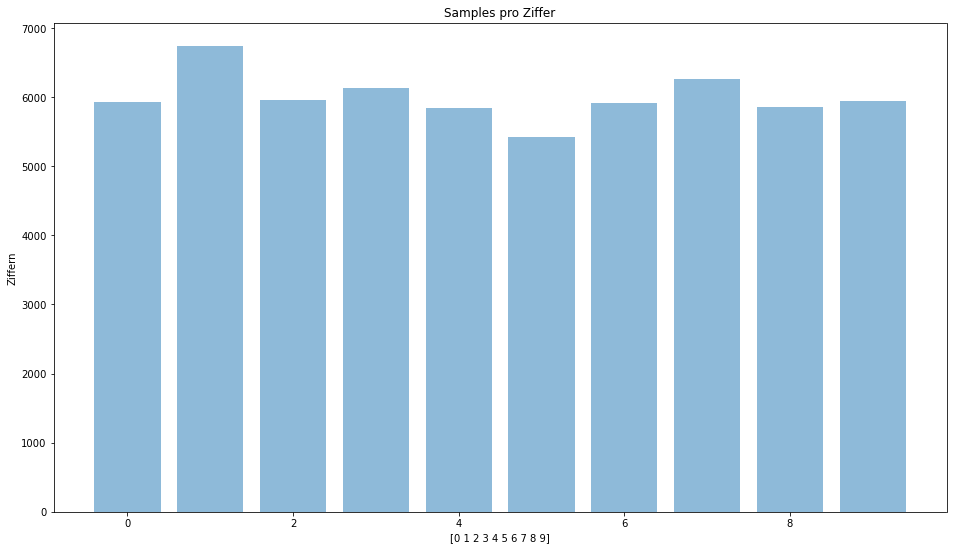

In [9]:
#
# Histogramm der Klassen (Ziffern)
#
#
# Prüfen der Verteilung der Klassen
#
df = pd.DataFrame(y_train,columns=['class'])
counts= df.groupby('class').size()

class_pos = np.arange(10)
plt.bar(class_pos, counts, align='center', alpha=0.5)
plt.xlabel(class_pos)
plt.ylabel('Ziffern')
plt.title('Samples pro Ziffer')
plt.show()

In [10]:
# 
# Ändere die Matrixform der Daten
#
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [11]:
# 
# Ändere Pixelwerte von 0..255 auf einen Wert zwischen 0 und 1 in Flieskommaform
#
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
# 
# Ändere die Zielwerte für die Klassifizierung (eine Vektorstelle pro Klasse)
#
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Erstes Modell

In [13]:
#
# Aufbau eines CNN Modelles mit einer CNN Schicht
#
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, batch_size=64, epochs=10 )

Epoch 1/5
60000/60000 [==============================] - 12s 197us/step - loss: 0.1593 - accuracy: 0.9508
Epoch 2/5
60000/60000 [==============================] - 12s 195us/step - loss: 0.0524 - accuracy: 0.9840
Epoch 3/5
60000/60000 [==============================] - 12s 196us/step - loss: 0.0310 - accuracy: 0.9902
Epoch 4/5
60000/60000 [==============================] - 13s 218us/step - loss: 0.0217 - accuracy: 0.9933
Epoch 5/5
60000/60000 [==============================] - 12s 199us/step - loss: 0.0136 - accuracy: 0.9955


In [14]:
model.predict(x_train[:2])

array([[1.45947920e-10, 5.94076663e-11, 1.44703161e-09, 1.51005518e-02,
        1.37565751e-12, 9.84882057e-01, 7.22183216e-11, 7.97237387e-10,
        1.04450756e-07, 1.72882228e-05],
       [9.99999881e-01, 2.74356406e-12, 1.03682133e-07, 2.86897051e-11,
        7.40167736e-12, 8.62271239e-15, 3.89868776e-10, 2.96019611e-13,
        3.39579725e-10, 3.97926941e-10]], dtype=float32)

In [ ]:
y_train[:1]

In [15]:
#
# Messen der Accuracy
#
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy {:.5f}'.format(acc))

Accuracy 0.98240


In [16]:
#
# Abschätzen der Fehler im Einsatz
#
print('Bei {} Samples sind rund {:.0f} Fehler zu erwarten.'.format( x_test.shape[0], (x_test.shape[0]*(1-acc))))

Bei 10000 Samples sind rund 176 Fehler zu erwarten.


# Verbesserung des Modelles

In [17]:
#
# Definition eines verbesserten Modelles mit folgenden Änderungen
# 1) weiterer convolutional layer
# 2) Vergrößerung der Filter
# 3) Vergrößerung des fully connected layers auf 256
# 4) Verlängerung des Trainings
#
model2 = Sequential()
model2.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model2.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform'))
model2.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(10, activation='softmax'))

In [18]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model2.fit(x_train, y_train, batch_size=64, epochs=10 )

Epoch 1/6
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1201 - accuracy: 0.9635
Epoch 2/6
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0383 - accuracy: 0.9880
Epoch 3/6
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0251 - accuracy: 0.9921
Epoch 4/6
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0185 - accuracy: 0.9942
Epoch 5/6
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0144 - accuracy: 0.9954
Epoch 6/6
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0128 - accuracy: 0.9958


In [20]:
#
# Messen der Accuracy
#
_, acc = model2.evaluate(x_test, y_test, verbose=0)
print('Accuracy {:.5f}'.format(acc))

Accuracy 0.99110


In [21]:
#
# Abschätzen der Fehler im Einsatz
#
print('Bei {} Samples sind rund {:.0f} Fehler zu erwarten.'.format( x_test.shape[0], (x_test.shape[0]*(1-acc))))

Bei 10000 Samples sind rund 89 Fehler zu erwarten.


In [22]:
#
# Ausgabe des Trainingsverlaufes
#
def summarize_diagnostics(history,modelname):
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.subplots_adjust(hspace=0.5)
    plt.savefig( 'results/' + modelname + '_plot.png')
    plt.show()
    plt.close()

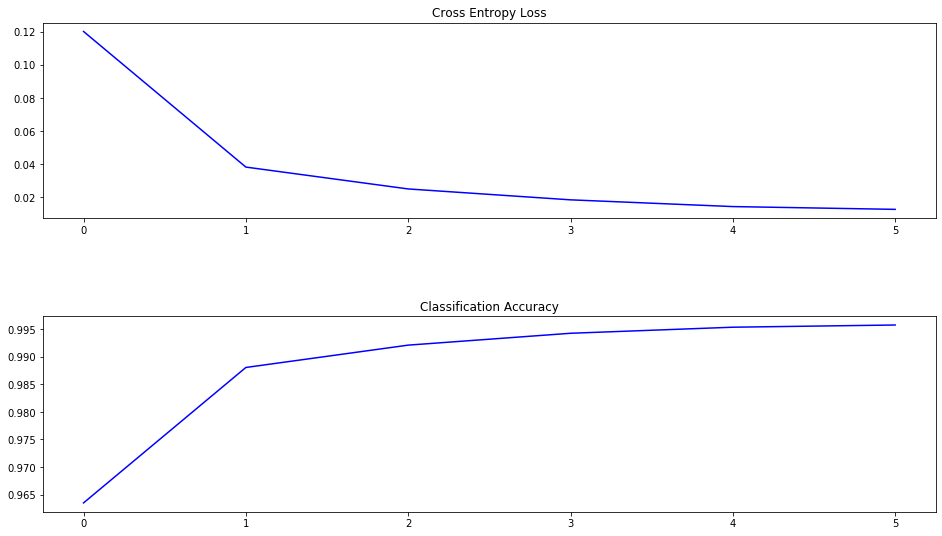

In [23]:
summarize_diagnostics(history,'04_model2')

# Speichern des Modelles

In [24]:
#
# Speichern des Modelles für später
#
from keras.models import model_from_json

prefix = 'results/04_'
modelName = prefix + "model.json"
weightName = prefix + "model.h5"

shallStore=True

# auf True setzen, wenn das neue Modell vollständig trainiert wurde
if shallStore:
    model_json = model2.to_json()
    with open( modelName , "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model2.save_weights( weightName )
    print("saved model to disk as {} {}".format(modelName,weightName))
else:    
    # wenn das neue Modell nur geladen werden soll (vorher gespeichert, ist nicht im git)    
    json_file = open(modelName, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(weightName)
    print("loaded model from disk")
    


saved model to disk as results/04_model.json results/04_model.h5


# Test des Modelles und Untersuchung der Fehler

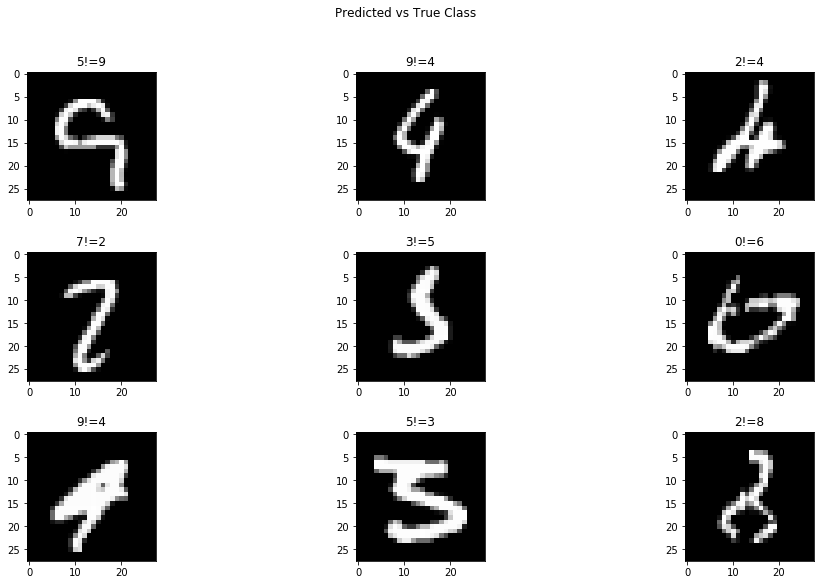

Anzahl der gefundenen Fehler ist 89


In [25]:
#
# Anzeige von Beispielen der Daten die fehlschlagen
#
from numpy import argmax

plotCount = 0
errorCount = 0
errorCountDistribution = [0] * 10
fig = plt.figure()
fig.suptitle('Predicted vs True Class')

for i in range(x_test.shape[0]):
    
    correctClass = argmax(y_test[i])
    image = x_test[i].reshape((1,28,28,1))
    prediction = model2.predict_classes([image])
    predictedClass = prediction[0]
    
    if predictedClass != correctClass:
        
        errorCount+= 1
        errorCountDistribution[correctClass] = errorCountDistribution[correctClass] + 1
        
        if plotCount < 9:
            ax = plt.subplot(330 + 1 + plotCount)
            ax.set_title('{}!={}'.format ( str(predictedClass), str(correctClass)))     
            image = x_test[i].reshape((28,28))
            plt.imshow(image, cmap=plt.get_cmap('gray'))    
            plotCount+= 1
        else:
            break
        

plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.show()
print('Anzahl der gefundenen Fehler ist {}'.format(errorCount))

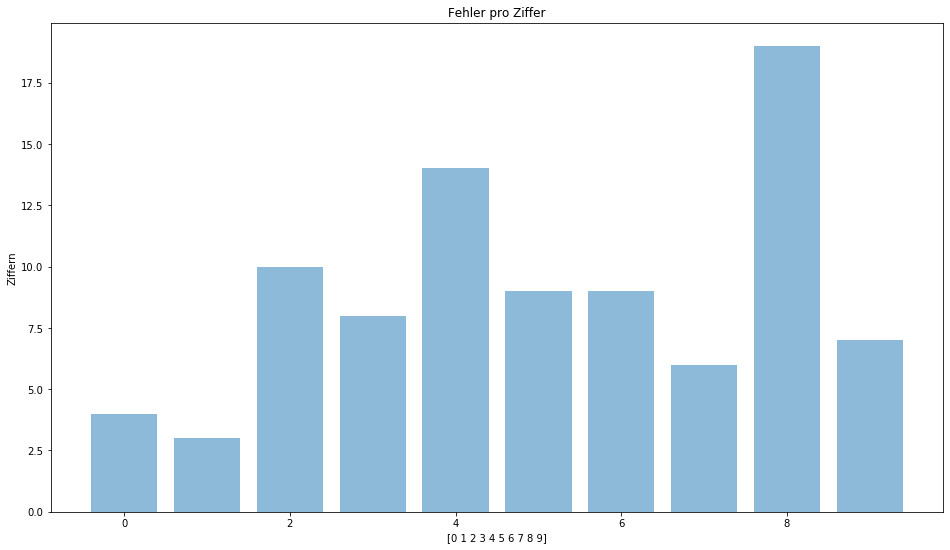

In [26]:
class_pos = np.arange(10)
plt.bar(class_pos, errorCountDistribution, align='center', alpha=0.5)
plt.xlabel(class_pos)
plt.ylabel('Ziffern')
plt.title('Fehler pro Ziffer')
plt.show()

# Testen mit eigenen Daten

In [27]:
# 
# Laden weiterer Funktionen
#
from PIL import Image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [28]:
# Funktion für das Laden eines Bildes aus einer Datei
def load_image(filename):
    # load the image
    img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [29]:
#
# Laden eines eigenen Bildes mit einer Ziffer (2,3,8,9)
#
image = load_image('data/3.png')

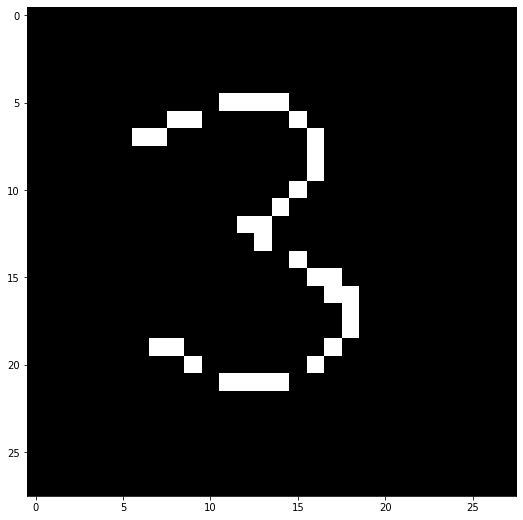

In [30]:
#
# Anzeige
#
imageShow = image.reshape((28,28))
plt.imshow(imageShow, cmap=plt.get_cmap('gray'))

In [31]:
prediction = model2.predict_classes([image])
predictedClass = prediction[0]

In [32]:
print('Die geschätzte Ziffer ist {}'.format(predictedClass) )

Die geschätzte Ziffer ist 3


In [33]:
prediction = model2.predict([image])

In [34]:
print(prediction)

[[6.4718402e-06 1.0132489e-04 1.3580108e-04 9.9472445e-01 1.1097709e-05
  4.0585855e-03 2.8879580e-05 9.1182665e-06 7.0486893e-04 2.1938483e-04]]


In [35]:
print('confidence {:.6f}'.format(prediction[0][3]))

confidence 0.994724
